*We use the dataset  'Netflix titles'*

[Dataset available at this link](https://www.kaggle.com/datasets/shivamb/netflix-shows) 


**About Dataset**

This dataset contains Unlabelled text data of around 9000 Netflix Shows and Movies along with Full details like Cast, Release Year, Rating, Description, etc.

Columns:
* **show_id:** Unique ID for every Movie / Tv Show
* **type:** Identifier a Movie or TV Show
* **title:** Title of the Movie / Tv Show 
* **director:** Director of the Movie
* **cast:** Actors involved in the movie / show 
* **country:** Country where the movie / show was produced 
* **date_added:** Date it was added on Netflix
* **release_year:** Actual Release year of the move / show
* **rating:** TV Rating of the movie / show
* **duration:** Total Duration - in minutes or number of seasons


*Import libraries*

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter 

*Load dataset*

In [2]:
df = pd.read_csv('netflix_titles.csv')

In [3]:
# show first five rows of dataset
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
print(f'Shape: {df.shape} ')

Shape: (8807, 12) 


*Search columns with missing values*

In [5]:
df.isnull()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,False,False,False,False,True,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,False,False
3,False,False,False,True,True,True,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,False,False,False,False,False,False,False,False,False,False,False,False
8803,False,False,False,True,True,True,False,False,False,False,False,False
8804,False,False,False,False,False,False,False,False,False,False,False,False
8805,False,False,False,False,False,False,False,False,False,False,False,False


*If at least one element of column is null the result is True, False otherwise*

In [6]:
df.isnull().any()

show_id         False
type            False
title           False
director         True
cast             True
country          True
date_added       True
release_year    False
rating           True
duration         True
listed_in       False
description     False
dtype: bool

*Show the number of missing values for each column*

In [7]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

*Shows total number of missing values for the entire dataset*

In [8]:
df.isnull().sum().sum()

4307

*Now we replace missing values with a default value*

In [9]:
df.director

0       Kirsten Johnson
1                   NaN
2       Julien Leclercq
3                   NaN
4                   NaN
             ...       
8802      David Fincher
8803                NaN
8804    Ruben Fleischer
8805       Peter Hewitt
8806        Mozez Singh
Name: director, Length: 8807, dtype: object

In [10]:
df.director.fillna('No Director', inplace=True)
df.director

0       Kirsten Johnson
1           No Director
2       Julien Leclercq
3           No Director
4           No Director
             ...       
8802      David Fincher
8803        No Director
8804    Ruben Fleischer
8805       Peter Hewitt
8806        Mozez Singh
Name: director, Length: 8807, dtype: object

In [11]:
df.cast

0                                                     NaN
1       Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...
2       Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...
3                                                     NaN
4       Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...
                              ...                        
8802    Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...
8803                                                  NaN
8804    Jesse Eisenberg, Woody Harrelson, Emma Stone, ...
8805    Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...
8806    Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...
Name: cast, Length: 8807, dtype: object

In [12]:
df.cast.fillna('No Cast', inplace=True)
df.cast

0                                                 No Cast
1       Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...
2       Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...
3                                                 No Cast
4       Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...
                              ...                        
8802    Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...
8803                                              No Cast
8804    Jesse Eisenberg, Woody Harrelson, Emma Stone, ...
8805    Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...
8806    Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...
Name: cast, Length: 8807, dtype: object

In [13]:
df.country

0       United States
1        South Africa
2                 NaN
3                 NaN
4               India
            ...      
8802    United States
8803              NaN
8804    United States
8805    United States
8806            India
Name: country, Length: 8807, dtype: object

In [14]:
df.country.fillna('No Country', inplace=True)
df.country

0       United States
1        South Africa
2          No Country
3          No Country
4               India
            ...      
8802    United States
8803       No Country
8804    United States
8805    United States
8806            India
Name: country, Length: 8807, dtype: object

*If at least one of columns:*
* *date_added*
* *rating*
* *duration*

*has missing value, we drop the row*

In [15]:
df.dropna(subset=["date_added", "rating", "duration"], inplace=True)

In [16]:
df.isnull().any()

show_id         False
type            False
title           False
director        False
cast            False
country         False
date_added      False
release_year    False
rating          False
duration        False
listed_in       False
description     False
dtype: bool

In [17]:
print(f'Shape after changes: {df.shape}')

Shape after changes: (8790, 12)


*Min e max of column release_year*

In [18]:
df['release_year'].min()

1925

In [19]:
df['release_year'].max()

2021

*groupby method*

In [20]:
df.groupby('rating')

In [21]:
df.groupby('rating').get_group("PG-13")

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
27,s28,Movie,Grown Ups,Dennis Dugan,"Adam Sandler, Kevin James, Chris Rock, David S...",United States,"September 20, 2021",2010,PG-13,103 min,Comedies,Mourning the loss of their beloved junior high...
28,s29,Movie,Dark Skies,Scott Stewart,"Keri Russell, Josh Hamilton, J.K. Simmons, Dak...",United States,"September 19, 2021",2013,PG-13,97 min,"Horror Movies, Sci-Fi & Fantasy",A family’s idyllic suburban life shatters when...
29,s30,Movie,Paranoia,Robert Luketic,"Liam Hemsworth, Gary Oldman, Amber Heard, Harr...","United States, India, France","September 19, 2021",2013,PG-13,106 min,Thrillers,"Blackmailed by his company's CEO, a low-level ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
8757,s8758,Movie,World Trade Center,Oliver Stone,"Nicolas Cage, Michael Peña, Maggie Gyllenhaal,...",United States,"November 20, 2019",2006,PG-13,129 min,"Action & Adventure, Dramas","Working under treacherous conditions, an army ..."
8764,s8765,Movie,Wyatt Earp,Lawrence Kasdan,"Kevin Costner, Dennis Quaid, Gene Hackman, Dav...",United States,"January 1, 2020",1994,PG-13,191 min,Action & Adventure,Legendary lawman Wyatt Earp is continually at ...
8766,s8767,Movie,XXx,Rob Cohen,"Vin Diesel, Asia Argento, Marton Csokas, Samue...",United States,"January 1, 2019",2002,PG-13,124 min,"Action & Adventure, Sports Movies",A notorious underground rush-seeker deemed unt...
8767,s8768,Movie,XXX: State of the Union,Lee Tamahori,"Ice Cube, Samuel L. Jackson, Willem Dafoe, Sco...",United States,"January 1, 2019",2005,PG-13,101 min,Action & Adventure,"In this action-packed follow-up to XXX, U.S. i..."


In [22]:
df.groupby("rating").get_group('PG-13').sort_values(by=['release_year'], ascending=False)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
88,s89,Movie,Blood Brothers: Malcolm X & Muhammad Ali,Marcus Clarke,"Malcolm X, Muhammad Ali",No Country,"September 9, 2021",2021,PG-13,96 min,"Documentaries, Sports Movies","From a chance meeting to a tragic fallout, Mal..."
560,s561,Movie,Audible,Matt Ogens,No Cast,No Country,"July 1, 2021",2021,PG-13,39 min,"Documentaries, Sports Movies","Shaken by a friend's suicide, a Deaf high scho..."
1370,s1371,Movie,The Dig,Simon Stone,"Carey Mulligan, Ralph Fiennes, Lily James, Joh...",United Kingdom,"January 29, 2021",2021,PG-13,113 min,"Dramas, International Movies","On the eve of World War II, a British widow hi..."
1088,s1089,Movie,Thunder Force,Ben Falcone,"Melissa McCarthy, Octavia Spencer, Jason Batem...",United States,"April 9, 2021",2021,PG-13,107 min,"Action & Adventure, Comedies",Two childhood best friends reunite as an unlik...
...,...,...,...,...,...,...,...,...,...,...,...,...
7844,s7845,Movie,Red Dawn,John Milius,"Patrick Swayze, C. Thomas Howell, Lea Thompson...",United States,"December 31, 2019",1984,PG-13,114 min,"Action & Adventure, Cult Movies",A group of teenagers witnesses Soviet and Cuba...
4861,s4862,Movie,Lupin the 3rd: The Castle of Cagliostro: Speci...,Hayao Miyazaki,"Yasuo Yamada, Kiyoshi Kobayashi, Eiko Masuyama...",Japan,"May 15, 2018",1979,PG-13,100 min,"Action & Adventure, Anime Features, Classic Mo...","Lupin, his sidekick, Jigen, and the samurai wa..."
7659,s7660,Movie,Once Upon a Time in the West,Sergio Leone,"Henry Fonda, Charles Bronson, Claudia Cardinal...","Italy, United States","November 20, 2019",1968,PG-13,166 min,"Action & Adventure, Classic Movies, Internatio...","In this epic spaghetti Western, a flinty gunsl..."
6619,s6620,Movie,Doctor Zhivago,David Lean,"Omar Sharif, Julie Christie, Geraldine Chaplin...","United States, Italy, United Kingdom, Liechten...","November 1, 2019",1965,PG-13,200 min,"Classic Movies, Dramas, Romantic Movies",A young physician and his beautiful mistress g...


*Movies VS TV Shows*

In [23]:
df.type.value_counts()

Movie      6126
TV Show    2664
Name: type, dtype: int64

In [24]:
df.type.value_counts().index

Index(['Movie', 'TV Show'], dtype='object')

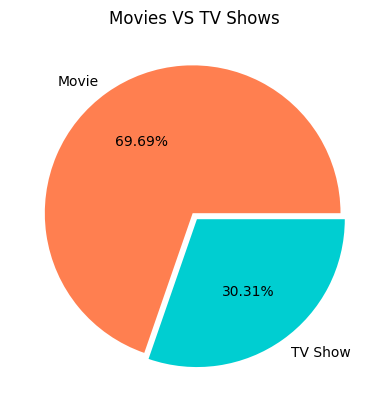

In [25]:
#plt.figure(figsize=(width, height)) in inches

#autopct: If not None, is a string or function used to label the wedges with their numeric value. 
#The label will be placed inside the wedge. If it is a format string, the label will be fmt % pct. 
#If it is a function, it will be called.

#explode: If not None, is a len(x) array which specifies the fraction of the radius with which to offset each wedge.

plt.figure()
plt.title("Movies VS TV Shows")
plot = plt.pie(df.type.value_counts(), 
              explode=(0.025,0.025), 
              labels=df.type.value_counts().index, 
              autopct="%1.2f%%", 
              colors=["coral","darkturquoise"])
plt.show()

**TOP 10 genres**

In [26]:
df.listed_in.head()

0                                        Documentaries
1      International TV Shows, TV Dramas, TV Mysteries
2    Crime TV Shows, International TV Shows, TV Act...
3                               Docuseries, Reality TV
4    International TV Shows, Romantic TV Shows, TV ...
Name: listed_in, dtype: object

In [27]:
genres = df.listed_in.str.split(', ', expand=True)
genres

,0,1,2
0,Documentaries,None,None
1,International TV Shows,TV Dramas,TV Mysteries
2,Crime TV Shows,International TV Shows,TV Action & Adventure
3,Docuseries,Reality TV,None
4,International TV Shows,Romantic TV Shows,TV Comedies
...,...,...,...
8802,Cult Movies,Dramas,Thrillers
8803,Kids' TV,Korean TV Shows,TV Comedies
8804,Comedies,Horror Movies,None
8805,Children & Family Movies,Comedies,None


In [28]:
genres.shape

(8790, 3)

In [29]:
genres = genres.stack()

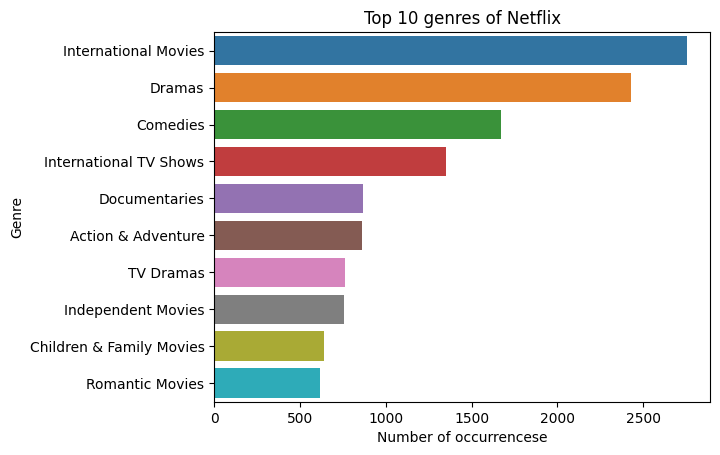

In [30]:
plot = sns.countplot(y = genres, order=genres.value_counts().index[:10])
plt.title('Top 10 genres of Netflix')
plt.xlabel('Number of occurrencese')
plt.ylabel('Genre')
plt.show()

**TOP 10 actors by appearance**

In [31]:
df.cast.head()

0                                              No Cast
1    Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...
2    Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...
3                                              No Cast
4    Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...
Name: cast, dtype: object

In [32]:
df_cast = df[df['cast']!='No Cast']
df_cast['cast']

1       Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...
2       Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...
4       Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...
5       Kate Siegel, Zach Gilford, Hamish Linklater, H...
6       Vanessa Hudgens, Kimiko Glenn, James Marsden, ...
                              ...                        
8801    Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...
8802    Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...
8804    Jesse Eisenberg, Woody Harrelson, Emma Stone, ...
8805    Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...
8806    Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...
Name: cast, Length: 7965, dtype: object

In [33]:
actors = df_cast['cast'].str.split(', ', expand=True)
actors

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
1,Ama Qamata,Khosi Ngema,Gail Mabalane,Thabang Molaba,Dillon Windvogel,Natasha Thahane,Arno Greeff,Xolile Tshabalala,Getmore Sithole,Cindy Mahlangu,...,None,None,None,None,None,None,None,None,None,None
2,Sami Bouajila,Tracy Gotoas,Samuel Jouy,Nabiha Akkari,Sofia Lesaffre,Salim Kechiouche,Noureddine Farihi,Geert Van Rampelberg,Bakary Diombera,None,...,None,None,None,None,None,None,None,None,None,None
4,Mayur More,Jitendra Kumar,Ranjan Raj,Alam Khan,Ahsaas Channa,Revathi Pillai,Urvi Singh,Arun Kumar,None,None,...,None,None,None,None,None,None,None,None,None,None
5,Kate Siegel,Zach Gilford,Hamish Linklater,Henry Thomas,Kristin Lehman,Samantha Sloyan,Igby Rigney,Rahul Kohli,Annarah Cymone,Annabeth Gish,...,None,None,None,None,None,None,None,None,None,None
6,Vanessa Hudgens,Kimiko Glenn,James Marsden,Sofia Carson,Liza Koshy,Ken Jeong,Elizabeth Perkins,Jane Krakowski,Michael McKean,Phil LaMarr,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8801,Ali Suliman,Saleh Bakri,Yasa,Ali Al-Jabri,Mansoor Alfeeli,Ahd,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
8802,Mark Ruffalo,Jake Gyllenhaal,Robert Downey Jr.,Anthony Edwards,Brian Cox,Elias Koteas,Donal Logue,John Carroll Lynch,Dermot Mulroney,Chloë Sevigny,...,None,None,None,None,None,None,None,None,None,None
8804,Jesse Eisenberg,Woody Harrelson,Emma Stone,Abigail Breslin,Amber Heard,Bill Murray,Derek Graf,None,None,None,...,None,None,None,None,None,None,None,None,None,None
8805,Tim Allen,Courteney Cox,Chevy Chase,Kate Mara,Ryan Newman,Michael Cassidy,Spencer Breslin,Rip Torn,Kevin Zegers,None,...,None,None,None,None,None,None,None,None,None,None


In [34]:
actors.shape

(7965, 50)

In [35]:
actors = actors.stack()

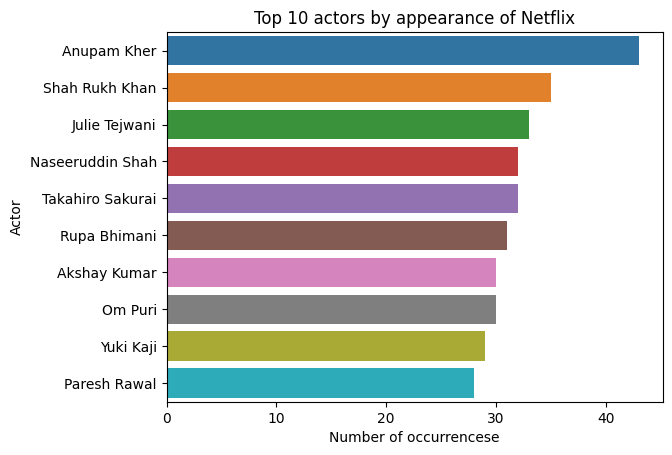

In [38]:
plot = sns.countplot(y = actors, order=actors.value_counts().index[:10])
plt.title('Top 10 actors by appearance of Netflix')
plt.xlabel('Number of occurrencese')
plt.ylabel('Actor')
plt.show()

**Rating comparation**

In [40]:
# unique values in rating column
df.rating.unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

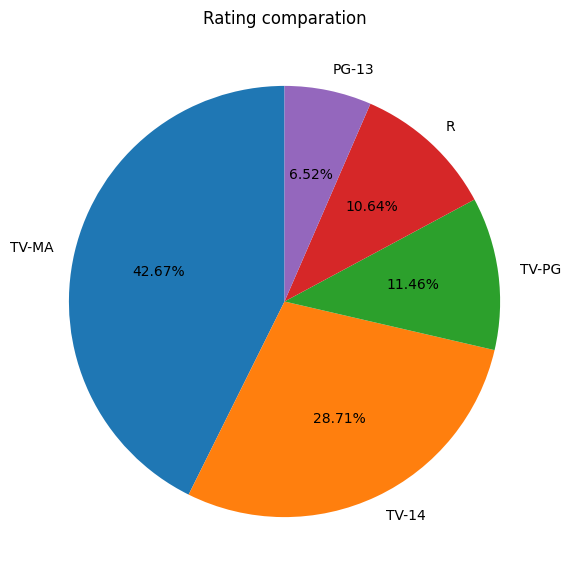

In [88]:
plt.figure(figsize=(7,7))
plt.title("Rating comparation")
plot = plt.pie(df.rating.value_counts()[:5],
              labels=df.rating.value_counts().index[:5], 
              autopct="%1.2f%%",
              startangle=90)
plt.show()

**Occurrence count for columns**

In [93]:
# dataframe
# column_name: name of column
# limit: number of items to display in order of counter

def return_counter(dataframe, column_name, limit):
    counter = Counter(dataframe[column_name].values)
    most_common = counter.most_common(limit)
    print(dict(most_common))

In [94]:
return_counter(dataframe=df, column_name="country", limit=3)

{'United States': 2809, 'India': 972, 'No Country': 829}


In [95]:
return_counter(dataframe=df, column_name="release_year", limit=3)

{2018: 1146, 2017: 1030, 2019: 1030}


In [96]:
return_counter(dataframe=df, column_name="director", limit=3)

{'No Director': 2621, 'Rajiv Chilaka': 19, 'Raúl Campos, Jan Suter': 18}


**Movies directed by David Fincher**

In [99]:
print(df[df['director'] == "David Fincher"]['title'])

600                            The Game
1595                               MANK
7701                         Panic Room
8320    The Girl with the Dragon Tattoo
8511                 The Social Network
8802                             Zodiac
Name: title, dtype: object


**Duration statistics**

In [103]:
df_movie = df[df['type'] == 'Movie']
df_movie.iloc[0]

show_id                                                        s1
type                                                        Movie
title                                        Dick Johnson Is Dead
director                                          Kirsten Johnson
cast                                                      No Cast
country                                             United States
date_added                                     September 25, 2021
release_year                                                 2020
rating                                                      PG-13
duration                                                   90 min
listed_in                                           Documentaries
description     As her father nears the end of his life, filmm...
Name: 0, dtype: object

In [105]:
# str value to number 
df_duration = df_movie['duration'].map(lambda x: x.rstrip('min')).astype(int)
df_duration

0        90
6        91
7       125
9       104
12      127
       ... 
8801     96
8802    158
8804     88
8805     88
8806    111
Name: duration, Length: 6126, dtype: int32

In [110]:
print(f'min: {df_duration.min()}')
print(f'max: {df_duration.max()}')
print(f'mean: {df_duration.mean()}')
print(f'median: {df_duration.median()}')
print(f'std: {df_duration.std()}')

min: 3
max: 312
mean: 99.58488410055502
median: 98.0
std: 28.283224595386848


*Histogram*

<AxesSubplot: >

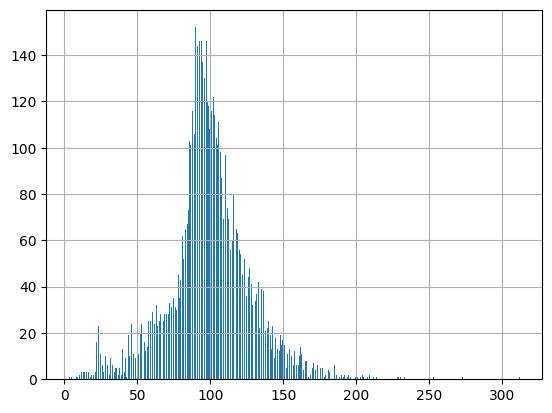

In [118]:
df_duration.hist(bins=500)